# Iris Classification

The Iris classification project is a classic data science and introductory machine learning project, especially for beginners. It uses the famous Iris dataset introduced by Ronald Fisher in 1936. It is still widely used today for classification projects.

The dataset contains 150 samples of iris flowers, 3 species: setosa, versicolor, and virginica. The features per sample are sepal length, sepal width, petal length, and petal width. Each of the samples of the dataset is labeled, which makes this project a supervised learning problem.

The dataset can be gotten from UCI machine learning: https://archive.ics.uci.edu/dataset/53/iris.

🧠 What’s the Goal?

To explore the dataset, train a machine learning model to predict the species of an iris flower based on its measurements and build an app on the best model.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### DATA VALIDATION

In [2]:
# Data loading
data ="iris.csv"
df = pd.read_csv(data)
# head of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Data tail
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
# Data shape
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')

There are 150 rows and 5 columns in the dataset.


In [5]:
# Data types
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

The length and width are float objects, i.e., continuous data, and the species labels are objects, i.e., strings.

In [6]:
# info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


There are 150 samples of the dataset and 5 columns; the dataset does not have any missing rows. 

In [7]:
# checking for duplicates
df.duplicated().sum()
print(f'There are {df.duplicated().sum()} duplicate rows in the dataset.')

There are 3 duplicate rows in the dataset.


In [8]:
# Description
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The sepals are larger in size compared to the petals; sepals have an average longer length and are wider in width compared to the petals. This is interestingly unique for the iris flower, as most flowers have larger and longer petals, which attract insects for pollination. https://en.wikipedia.org/wiki/Petal.

In [9]:
# Description of the non numerical column
(df.species.describe())

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [10]:
# Checking for the unique values and counts
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

The data frame shows an equal number of iris species.

The data was loaded into a dataframe from a .csv file. The validation process shows the data has five columns. Four of the columns contain the features of the data that include the sepal length and width and the petal length and width. The lengths and widths are all continuous data, while the species column is a python object of equal number of species. There are no missing data, and only three duplicated rows.

## Exploratory data analysis

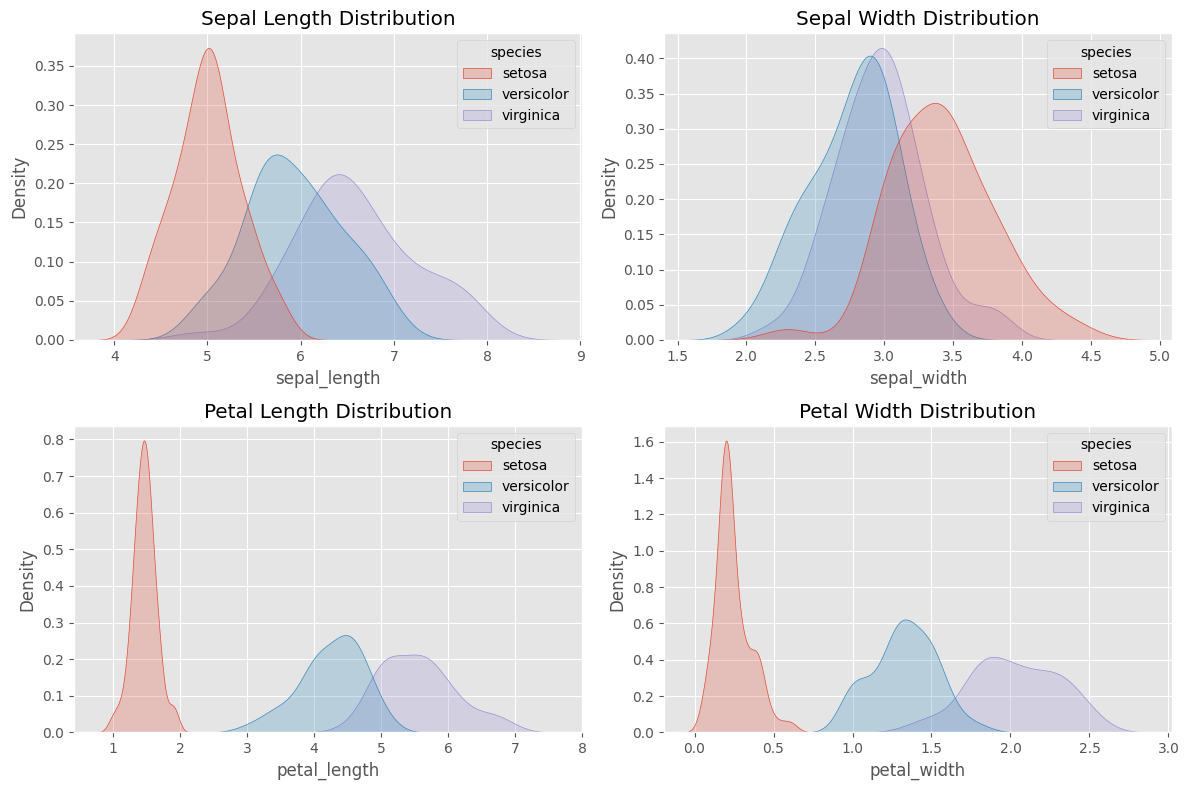

In [11]:
# Exploring the distribution of the features of the flowers
# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot KDEs for each feature
sns.kdeplot(data=df, x="sepal_length", hue="species", fill=True, ax=axes[0, 0])
axes[0, 0].set_title("Sepal Length Distribution")

sns.kdeplot(data=df, x="sepal_width", hue="species", fill=True, ax=axes[0, 1])
axes[0, 1].set_title("Sepal Width Distribution")

sns.kdeplot(data=df, x="petal_length", hue="species", fill=True, ax=axes[1, 0])
axes[1, 0].set_title("Petal Length Distribution")

sns.kdeplot(data=df, x="petal_width", hue="species", fill=True, ax=axes[1, 1])
axes[1, 1].set_title("Petal Width Distribution")

plt.tight_layout()
plt.show()

The KDE plot shows a clear distribution of the features of the flower species. The Setosa species shows a clear, unique distribution compared to the rest of the species; it has shorter petal length, width, and sepal length. Virginica and Versicolor show similar distribution in sepal and petal length, but virginica shows longer petal and sepal length and petal width. All three iris species show similar distribution in sepal width distribution, but Setosa shows a bit longer sepal width compared to the other species.

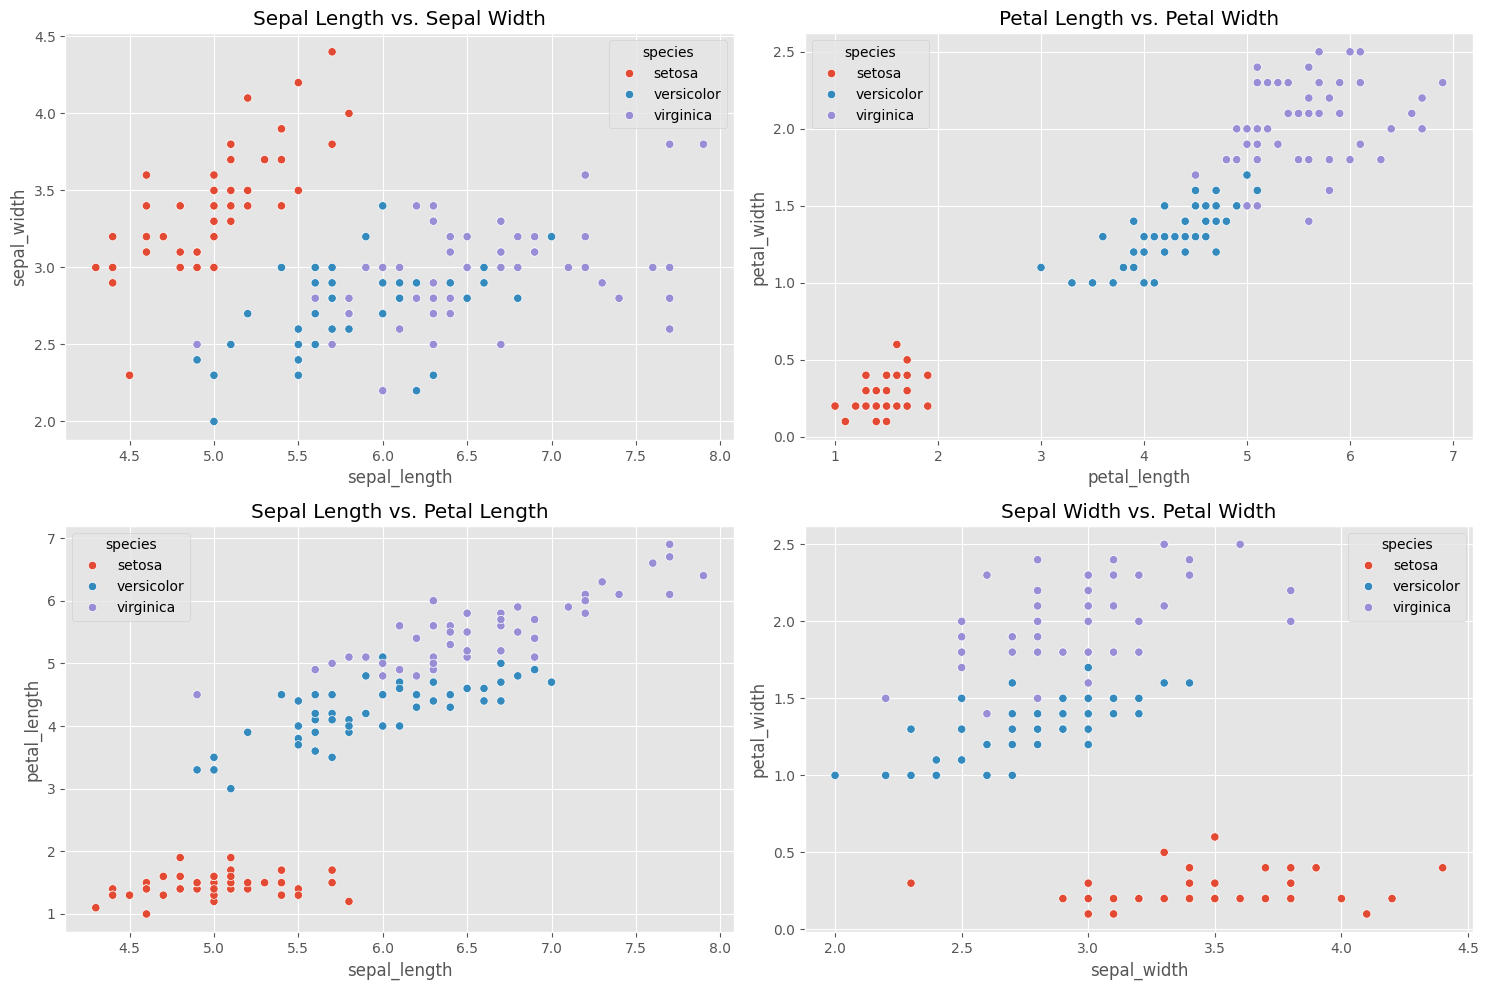

In [12]:
# Scatter plot of the features cooloured by the species
# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot scatter plot for each feature
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", ax=axes[0, 0])
axes[0, 0].set_title("Sepal Length vs. Sepal Width")

sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species", ax=axes[0, 1])
axes[0, 1].set_title("Petal Length vs. Petal Width")

sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="species", ax=axes[1, 0])
axes[1, 0].set_title("Sepal Length vs. Petal Length")

sns.scatterplot(data=df, x="sepal_width", y="petal_width", hue="species", ax=axes[1, 1])
axes[1, 1].set_title("Sepal Width vs. Petal Width")

plt.tight_layout()
plt.show()

The scatterplot of the features colored by their species shows that, out of the three species of irises, setosas are easily distinguishable from the other species, virginica and versicolor show similar feature attributes, especially with their sepal width.

Do the features show natural distribution?

In [13]:
# Pca decomposition of the features
# instantia PCA
pca = PCA(n_components=2)
# Fit and transform the data
df_pca = pca.fit_transform(df.iloc[:, :-1])
print(f'The number of columns in the dataset after PCA: {df_pca.shape[1]}, the number of samples after PCA: {df_pca.shape[0]}')

The number of columns in the dataset after PCA: 2, the number of samples after PCA: 150


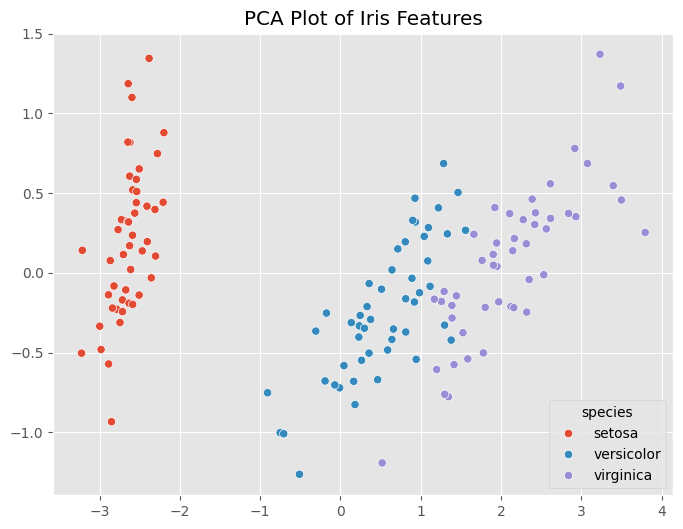

The explained variance ratio is:[0.92461621 0.05301557]


In [14]:
# Plotting the principal component and colouring by the species
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["species"])
plt.title("PCA Plot of Iris Features")
plt.show() 
print(f'The explained variance ratio is:{pca.explained_variance_ratio_}')

After decomposition of the features into two principal components while still maintaining high variance of 97.8% (gotten from the explained variance ratio), the scatterplot still shows clear separation of Setosa species from Versicolor and Verginica.

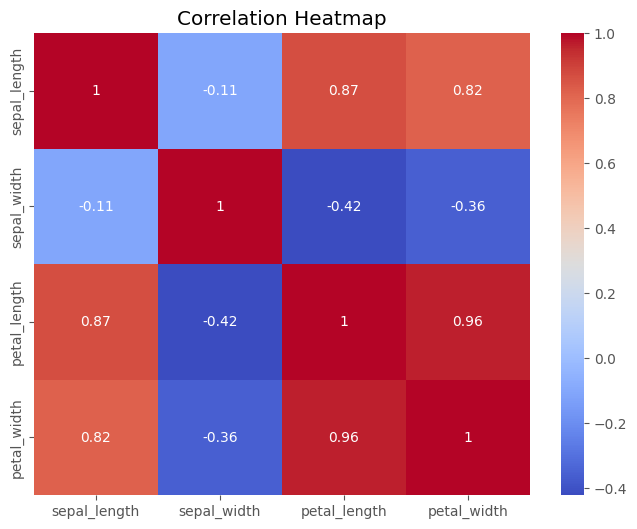

In [15]:
# Correlation heatmap of the features
plt.figure(figsize=(8, 6))
numerical_cols = df.select_dtypes(include="number").columns
sns.heatmap(df.loc[:, numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap reveals that petal length is strongly and positively correlated with petal width but exhibits a negative relationship with sepal width. Meanwhile, sepal length and sepal width demonstrate a weak negative correlation. Notably, there’s a strong positive correlation between sepal length and petal width, as well as between sepal length and petal length.

### Classification

In [16]:
# Preprocessing
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(f'The shape of X is: {X.shape}, the shape of y is: {y.shape}')

The shape of X is: (150, 4), the shape of y is: (150,)


In [17]:
# Scaling the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
print(f'The shape of X_train is: {X_train.shape}, the shape of y_train is: {y_train.shape}, the shape of X_test is: {X_test.shape}, the shape of y_test is: {y_test.shape}')

The shape of X_train is: (120, 4), the shape of y_train is: (120,), the shape of X_test is: (30, 4), the shape of y_test is: (30,)


This is a supervised learning classification task. To build our baseline models, we will be using the K-nearest neighbor and logistic regression models.

In [18]:
#Baseline model 1
# K Nearest Neighbour
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(f'Training set accuracy: {knn.score(X_train, y_train)}')
print(f'Test set accuracy: {knn.score(X_test, y_test)}')

Training set accuracy: 0.9666666666666667
Test set accuracy: 0.9333333333333333


The KNN model shows training set accuracy of 96.7% and test set accuracy of 93.3%; this shows that the model does not overfit on the training data and generalizes well to the test set.

In [19]:
# Baseline model 2
# Logistic rgression
lr = LogisticRegression(random_state= 42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f'Training set accuracy: {lr.score(X_train, y_train)}')
print(f'Test set accuracy: {lr.score(X_test, y_test)}')

Training set accuracy: 0.9583333333333334
Test set accuracy: 0.9333333333333333


The logistic regression model shows training set accuracy of 95.8% and test set accuracy of 93.3%. This shows the logistic regression model does not overfit on the training set and generalizes well on the test set. Both the logistic regression and the KNN model show the same accuracy on the test set.

For the complex model, i will be training a random forest classifier and a Multilayer perceptron model.

In [20]:
# Complex model 1
# Random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print(f'Training set accuracy: {rfc.score(X_train, y_train)}')
print(f'Test set accuracy: {rfc.score(X_test, y_test)}')

Training set accuracy: 1.0
Test set accuracy: 0.9333333333333333


The training accuracy for the random forest classifier shows 100% accuracy on the training set and 93.3% accuracy on the test set. This shows that the random forest classifier overfits on the training training set and fails to generalize on the test set.

In [21]:
# Complex model 2
# Multilayer perceptron classifier
mlp = MLPClassifier(random_state=42  )
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print(f'Training set accuracy: {mlp.score(X_train, y_train)}')
print(f'Test set accuracy: {mlp.score(X_test, y_test)}')

Training set accuracy: 0.9666666666666667
Test set accuracy: 0.9333333333333333
/root/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The multilayer perceptron classifier has a training accuracy of 96.7% and a test accuracy of 9.3%. This means the multilayer perceptron model does not overfit on the training data and generalizes well to the test set. 

All models used with their default hyperparameters show test set accuracy of 93.3%. KNN and MLPClassifier performed best without overfitting, and the random forest classifier overfits to the training set.

### Hyperparameter tuning

In [22]:
# Hyperparameter tuning
# Defining a function to tune the hyperparameters
def tune_hyperparameters(model, param_grid):
    grid = GridSearchCV(model, param_grid, cv=5)
    grid.fit(X_train, y_train)
    print(f'The best parameters are: {grid.best_params_}')
    print(f'The best score is: {grid.best_score_}')
    return grid.best_estimator_

In [23]:
# Defining the parameter grid and tuning the KNN model
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

knn_tuned = tune_hyperparameters(knn, param_grid)

# Defining the parameter grid and tuning the logistic regression model
param_grid = {
    'C': [0.01,0.1, 1, 10],
    'penalty': ['l2']

}

lr_tuned = tune_hyperparameters(lr, param_grid)

# Defining the parameter grid and tuning the random forest classifier
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [ 2, 5, 10]
}

rfc_tuned = tune_hyperparameters(rfc, param_grid)

# Defining the parameter grid and tuning the Multilayer perceptron classifier
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.0001],
    'max_iter': [1000],
    

}

mlp_tuned = tune_hyperparameters(mlp, param_grid)

print(f"The best KNN model is: {knn_tuned}")
print(f"The best Logistic regression model is: {lr_tuned}")
print(f"The best Random forest classifier is: {rfc_tuned}")
print(f"The best Multilayer perceptron classifier is: {mlp_tuned}")

The best parameters are: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
The best score is: 0.9583333333333334
The best parameters are: {'C': 10, 'penalty': 'l2'}
The best score is: 0.9666666666666668
The best parameters are: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
The best score is: 0.9583333333333334
/root/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn'

In [24]:
# using the best models to predict the test set
y_pred_knn_tuned = knn_tuned.predict(X_test)
y_pred_lr_tuned = lr_tuned.predict(X_test)
y_pred_rfc_tuned = rfc_tuned.predict(X_test)
y_pred_mlp_tuned = mlp_tuned.predict(X_test)

print(f'The accuracy of the tuned KNN on Training set is: {knn_tuned.score(X_train, y_train)}')
print(f'The accuracy of the tuned KNN on Test set is: {knn_tuned.score(X_test, y_test)}') 
print(f'The accuracy of the tuned Logistic regression on Training set is: {lr_tuned.score(X_train, y_train)}')
print(f'The accuracy of the tuned Logistic regression on Test set is: {lr_tuned.score(X_test, y_test)}')
print(f'The accuracy of the tuned Random forest classifier on Training set is: {rfc_tuned.score(X_train, y_train)}')
print(f'The accuracy of the tuned Random forest classifier on Test set is: {rfc_tuned.score(X_test, y_test)}')
print(f'The accuracy of the tuned Multilayer perceptron classifier on Training set is: {mlp_tuned.score(X_train, y_train)}')
print(f'The accuracy of the tuned Multilayer perceptron classifier on Test set is: {mlp_tuned.score(X_test, y_test)}')

The accuracy of the tuned KNN on Training set is: 0.9583333333333334
The accuracy of the tuned KNN on Test set is: 0.9666666666666667
The accuracy of the tuned Logistic regression on Training set is: 0.975
The accuracy of the tuned Logistic regression on Test set is: 1.0
The accuracy of the tuned Random forest classifier on Training set is: 1.0
The accuracy of the tuned Random forest classifier on Test set is: 0.9666666666666667
The accuracy of the tuned Multilayer perceptron classifier on Training set is: 0.9833333333333333
The accuracy of the tuned Multilayer perceptron classifier on Test set is: 0.9666666666666667


In [25]:
# Defining the model names
model_names = ['KNN', 'Logistic Regression', 'Random Forest', 'MLP']

# Creating a table to show training and test accuracy before and after tuning

# Accuracies before tuning
training_accuracies_before = [
    knn.score(X_train, y_train),
    lr.score(X_train, y_train),
    rfc.score(X_train, y_train),
    mlp.score(X_train, y_train)
]

test_accuracies_before = [
    knn.score(X_test, y_test),
    lr.score(X_test, y_test),
    rfc.score(X_test, y_test),
    mlp.score(X_test, y_test)
]

# Accuracies after tuning
training_accuracies_after = [
    knn_tuned.score(X_train, y_train),
    lr_tuned.score(X_train, y_train),
    rfc_tuned.score(X_train, y_train),
    mlp_tuned.score(X_train, y_train)
]

test_accuracies_after = [
    knn_tuned.score(X_test, y_test),
    lr_tuned.score(X_test, y_test),
    rfc_tuned.score(X_test, y_test),
    mlp_tuned.score(X_test, y_test)
]

# Creating a DataFrame for the table
accuracy_table = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy (Before Tuning)': training_accuracies_before,
    'Test Accuracy (Before Tuning)': test_accuracies_before,
    'Training Accuracy (After Tuning)': training_accuracies_after,
    'Test Accuracy (After Tuning)': test_accuracies_after
})

# Displaying the table
display(accuracy_table)


,Model,Training Accuracy (Before Tuning),Test Accuracy (Before Tuning),Training Accuracy (After Tuning),Test Accuracy (After Tuning)
0,KNN,0.966667,0.933333,0.958333,0.966667
1,Logistic Regression,0.958333,0.933333,0.975000,1.000000
2,Random Forest,1.000000,0.933333,1.000000,0.966667
3,MLP,0.966667,0.933333,0.983333,0.966667


The table shows the comparison of the models performances before and after hyperparameter tuning. KNN shows significant improvement in generalization on the test set, improving from 93.3% to 96.7% accuracy. The logistic regression model shows improvement from 93.3% to 100%. This is a very significant improvement by the logistic regression model, which also improved its training accuracy from 95.8% to 97.5%. The random forest still overfits to the training data even after model tuning and achieved better test set accuracy after tuning, jumping from 93.3% to 96.7%. The MLP model performed better after tuning, having a better generalization on the test set after tuning from 93.3% to 96.7%.

In [26]:
# Displaying the prediction table of the logistic regression model after hyperparameter tuning
print(pd.crosstab(y_test, y_pred_lr_tuned, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted   setosa  versicolor  virginica  All
True                                          
setosa          10           0          0   10
versicolor       0          10          0   10
virginica        0           0         10   10
All             10          10         10   30


In [27]:
# Cross validation on the tuned  models
lr_tuned_scores = cross_val_score(lr_tuned, X_test, y_test, cv=5)
knn_tuned_scores = cross_val_score(knn_tuned, X_test, y_test, cv=5)
rfc_tuned_scores = cross_val_score(rfc_tuned, X_test, y_test, cv=5)
mlp_tuned_scores = cross_val_score(mlp_tuned, X_test, y_test, cv=5)


print("Mean cross-validation score lr:", lr_tuned_scores.mean())
print("Mean cross-validation score knn:", knn_tuned_scores.mean())
print("Mean cross-validation score rfc:", rfc_tuned_scores.mean())
print("Mean cross-validation score mlp:", mlp_tuned_scores.mean())

/root/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/root/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
Mean cross-validation score lr: 0.9333333333333333
Mean cross-validation score k

The 5-fold cross-validation score shows that the logistic regression and MLP model score 93.3% when shown a subset of the data, making it harder to capture general patterns; the result still shows that the model performs well in generalization on the test set, these two models show satisfactory results.

In [28]:
# Importing the pickle module
import pickle

# Saving the satisfactory tuned models
with open('lr_tuned.pkl', 'wb') as f:
    pickle.dump(lr_tuned, f)

with open('mlp_tuned.pkl', 'wb') as f:
    pickle.dump(mlp_tuned, f)

#saving the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Observation

The dataset used for this model is small in features and samples, making complex models like the random forest and MLP easily overfit. For a small classification task with these attributes, the simpler models should perform better. 

### Summary

The Iris Classification project aimed to predict the species of an iris flower based on its measurements (sepal length, sepal width, petal length, and petal width). The dataset consisted of 150 samples evenly distributed across three species: Setosa, Versicolor, and Virginica. The project followed these steps:

1. Data Exploration:
 - The dataset was analyzed for duplicates, missing values, and feature distributions.
- KDE plots and scatter plots revealed that Setosa is easily distinguishable, while Versicolor and Virginica have overlapping features.     - PCA was applied to reduce dimensions, retaining 97.8% variance, and confirmed the separability of Setosa.

2. Model Training:
   - Four models were trained: K-Nearest Neighbors (KNN), Logistic Regression, Random Forest Classifier, and Multilayer Perceptron (MLP).
   - Initial results showed all models achieving 93.3% test accuracy, with Random Forest overfitting the training data.

3. Hyperparameter Tuning:
   - GridSearchCV was used to optimize hyperparameters for all models.
   - Logistic regression achieved the best performance with 100% test accuracy after tuning.
   - KNN, Random Forest, and MLP improved to 96.7% test accuracy.

4. Evaluation:
   - Logistic regression and MLP demonstrated the best generalization, confirmed by a cross-validation score of 93.3%.
   - Crostab showed perfect classification for logistic regression on the test set.

5. Deployment:
   - The tuned models (logistic regression and MLP) were saved for future use.

Conclusion and recommendation

The logistic regression and multilayer perceptron models performed best; for deployment, explainability, and low computational resource settings, I would recommend the logistic model. I would keep the MLP model as a backup and in cases where model explainability and computational cost won't be a requirement.